**MÉTODO DE EULLER**

In [2]:
import numpy as np

## Recebe:
##   g(x,y): a derivada da função f(x)
##   x0 e y0: condição inicial y0 = f(x0)
##   h: passo
##   n: quantidade de iterações

exp = input()
x0 = float(input())
y0 = float(input())
h = float(input())
n = int(input())
g = lambda x, y: eval(exp)

## A partir daqui, g, x0, y0, h e n estão definidos

def Euler(g, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    x[0] = x0
    y[0] = y0

    for i in range(n):
        x[i + 1] = x[i] + h
        y[i + 1] = y[i] + h * g(x[i], y[i])

    return (x, y)


_, y_values = Euler(g, x0, y0, h, n)

saida = y_values[n]

print(f'{saida:.3f}')

SyntaxError: invalid syntax (<string>, line 0)

**método de Heun**

In [ ]:
import numpy as np

##   Recebe:
##     g(x,y): a derivada da função f(x)
##     x0 e y0: condição inicial y0 = f(x0)
##     h: passo
##     n: quantidade de iterações

## A partir daqui, g, x0, y0, h e n estão definidos
exp = input()
x0 = float(input())
y0 = float(input())
h = float(input())
n = int(input())
g = lambda x, y: eval(exp)

def Heun(g, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0] = x0
    y[0] = y0

    for i in range(n):
        x[i + 1] = x[i] + h
        # Previsão
        y_pred = y[i] + h * g(x[i], y[i])
        # Correção
        y[i + 1] = y[i] + (h / 2) * (g(x[i], y[i]) + g(x[i + 1], y_pred))

    return (x, y)


(x, y) = Heun(g, x0, y0, h, n)

saida = y[n]

print(f'{saida:.3f}')

método do ponto médio

In [1]:
import numpy as np

##   Recebe:
##     g(x,y): a derivada da função f(x)
##     x0 e y0: condição inicial y0 = f(x0)
##     h: passo
##     n: quantidade de iterações
exp = input()
x0 = float(input())
y0 = float(input())
h = float(input())
n = int(input())
g = lambda x, y: eval(exp)


def PontoMedio(g, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)

    x[0] = x0
    y[0] = y0

    for i in range(n):
        x[i + 1] = x[i] + h
        k1 = h * g(x[i], y[i])
        k2 = h * g(x[i] + h / 2, y[i] + k1 / 2)
        y[i + 1] = y[i] + k2

    return (x, y)

(x, y) = PontoMedio(g, x0, y0, h, n)

saida = y[n]

##  NÃO ALTERE O CÓDIGO ABAIXO, ele é usado para verificação.
print(f'{saida:.3f}')


Este código resolve uma equação diferencial que modela a altura de uma coluna d'água ao longo do tempo usando três métodos numéricos: o método de Euler, o método de Heun (Euler melhorado), e o método de Runge-Kutta de 4ª ordem (RK-4). Em seguida, ele compara os resultados numéricos com dados experimentais e plota o gráfico da altura da coluna d'água ao longo do tempo.

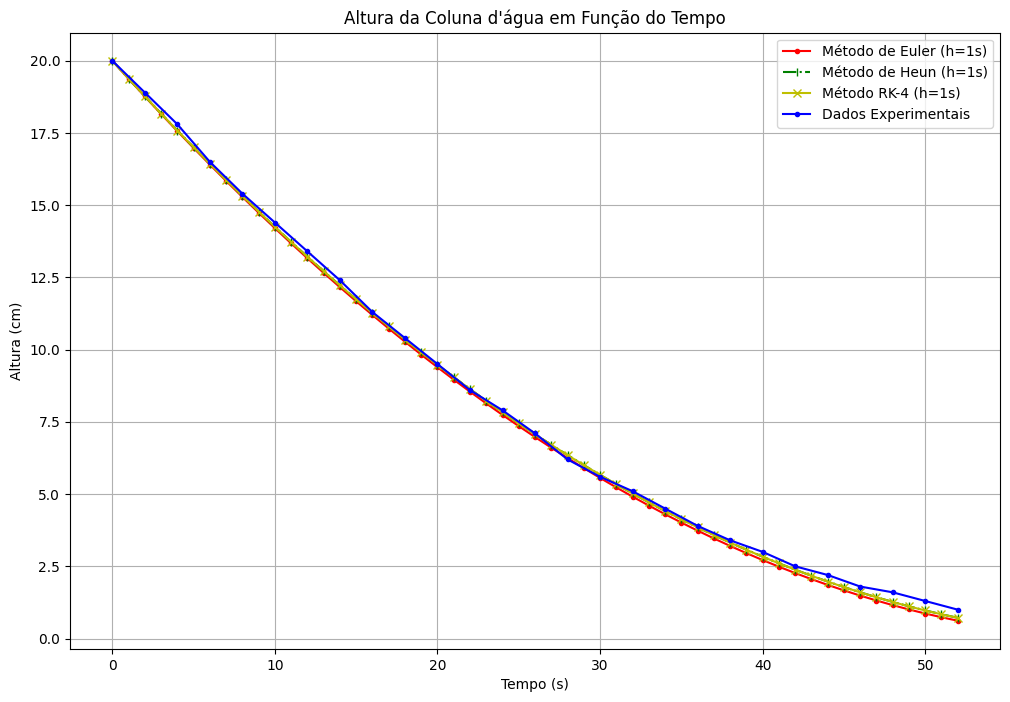

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função para a equação diferencial
def dy_dt(y, k, g):
    return (-k * np.sqrt (2 * g *y))

# Implementação do método de Euler
def euler_method(dy_dt, y0, t0, tf, h, k, g):
    num_steps = int((tf - t0) / h) + 1
    t = np.arange(t0, tf + h, h)
    y = np.zeros(num_steps)
    y[0] = y0

    for i in range(1, num_steps):
        y[i] = y[i - 1] + h * dy_dt(y[i - 1], k, g)

    return t, y

# Implementação do método de Heun (ou método de Euler melhorado)
def heun_method(dy_dt, y0, t0, tf, h, k, g):
    num_steps = int((tf - t0) / h) + 1
    t = np.arange(t0, tf + h, h)
    y = np.zeros(num_steps)
    y[0] = y0

    for i in range(1, num_steps):
        y_pred = y[i - 1] + h * dy_dt(y[i - 1], k, g)  # Predição
        y[i] = y[i - 1] + (h / 2) * (dy_dt(y[i - 1], k, g) + dy_dt(y_pred, k, g))  # Correção

    return t, y

# Implementação do método de Runge-Kutta de 4ª ordem (RK-4)
def rk4_method(dy_dt, y0, t0, tf, h, k, g):
    num_steps = int((tf - t0) / h) + 1
    t = np.arange(t0, tf + h, h)
    y = np.zeros(num_steps)
    y[0] = y0

    for i in range(1, num_steps):
        k1 = h * dy_dt(y[i - 1], k, g)
        k2 = h * dy_dt(y[i - 1] + 0.5 * k1, k, g)
        k3 = h * dy_dt(y[i - 1] + 0.5 * k2, k, g)
        k4 = h * dy_dt(y[i - 1] + k3, k, g)
        y[i] = y[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, y

# Parâmetros
k = 0.0315
g = 9.80  # aceleração da gravidade em cm/s^2
y0 = 20  # altura inicial em cm
t0 = 0   # tempo inicial em segundos
tf = 52  # tempo final em segundos
h = 1    # passo de tempo em segundos (para Heun e RK-4)

# Chama as funções dos métodos
t_euler, y_euler = euler_method(dy_dt, y0, t0, tf, h, k, g)
t_heun, y_heun = heun_method(dy_dt, y0, t0, tf, h, k, g)
t_rk4, y_rk4 = rk4_method(dy_dt, y0, t0, tf, h, k, g)

# Dados experimentais
t_experimental = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52])
h_experimental = np.array([20.0, 18.9, 17.8, 16.5, 15.4, 14.4, 13.4, 12.4, 11.3, 10.4, 9.5, 8.6, 7.9, 7.1, 6.2, 5.6, 5.1, 4.5, 3.9, 3.4, 3.0, 2.5, 2.2, 1.8, 1.6, 1.3, 1.0])

# Plotando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(t_euler, y_euler, marker='.', linestyle='-', color='r', label='Método de Euler (h=1s)')
plt.plot(t_heun, y_heun, marker='|', linestyle='-.', color='g', label='Método de Heun (h=1s)')
plt.plot(t_rk4, y_rk4, marker='x', linestyle='-', color='y', label='Método RK-4 (h=1s)')
plt.plot(t_experimental, h_experimental, marker='.', linestyle='-', color='b', label='Dados Experimentais')
plt.title('Altura da Coluna d\'água em Função do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (cm)')
plt.legend()
plt.grid(True)
plt.show()
